# Lab 1: Version Control with Git

**This tutorial is largely based on the repository**:

git@github.com:rdadolf/git-and-github.git

**which was created for IACS's ac297r course, By Robert Adolf. Most of the credit goes to him**.

Version control is a way of tracking the change history of a project. Even if you have never used a version control tool, you've probably already done it manually: copying and renaming project folders ("paper-1.doc", "paper-2.doc", etc.) is a form of version control.

Git is a tool that automates and enhances a lot of the tasks that arise when dealing with larger, longer-living, and collaborative projects. It's also become the common underpinning to many popular online code repositories, [GitHub](https://github.com/) being the most popular.

We'll go over the basics of git, but we should point out that a *lot* of talented people have given git tutorials, and we won't do any better than they have. In fact, if you're interested in learning git deeply and have some time on your hands, I suggest you stop reading this and instead read [the Git Book](http://git-scm.com/book/en/v2). Scott Chacon and Ben Straub have done a tremendous job, and if you want to understand both the interfaces and the mechanisms behind git, this is the place to start.

In this document, we'll go over the concepts of git that are relevant to this course. You will be using git in a particular fashion, in this course, which is described in Homework 0. Homework 0 also contains details about how to install git; so if you havent done so, please do so and come back here.

#Table of Contents
* [Lab 1: Version Control with Git](#Lab-1:-Version-Control-with-Git)
	* [Why should you use version control?](#Why-should-you-use-version-control?)
	* [Git Basics](#Git-Basics)
	* [Common Tasks in the version control of files.](#Common-Tasks-in-the-version-control-of-files.)
		* [Forking a repository](#Forking-a-repository)
		* [Cloning a repository](#Cloning-a-repository)
		* [Poking around](#Poking-around)
		* [Making changes](#Making-changes)
		* [Remotes and `fetch`ing from them](#Remotes-and-fetching-from-them)
		* [Branching.](#Branching.)
		* [Recovering from a mistake](#Recovering-from-a-mistake)
		* [Changing only one file](#Changing-only-one-file)
	* [The Homework git flow](#The-Homework-git-flow)
	* [The Lab git flow](#The-Lab-git-flow)
	* [Creating a new repository](#Creating-a-new-repository)
	* [Github Pages](#Github-Pages)
		* [Automatically Generated Project Pages](#Automatically-Generated-Project-Pages)
		* [Static Project Pages](#Static-Project-Pages)
	* [Git habits](#Git-habits)


**At this point, we assume you have installed git as described in HW0 and have followed the instructions there to create ssh keys for your machine**. This enables you to use git without a pesky username-password combination.

----

## Why should you use version control?

If you ask 10 people, you'll get 10 different answers, but one of the commonalities is that most people don't realize how integral it is to their development process until they've started using it. Still, for the sake of argument, here are some highlights:

- ** You can undo anything: ** Git provides a *complete history* of every change that has ever been made to your project, timestamped, commented, and attributed. If something breaks, you always have the choice of going back to a previous state.
- ** You won't *need* to keep undo-ing things: ** One of the advantages of using git properly is that by keeping new changes separate from a stable base, you tend to avoid the massive rollbacks associated with constantly tinkering with a single code.
- ** You can identify exactly when and where changes were made: ** Git allows you to pinpoint when a particular piece of code was changed, so finding what other pieces of code a bug might affect or figuring out why a certain expression was added is easy.
- ** Git forces teams to face conflicts directly: ** On a team-based project, many people are often working with the same code. By having a tool which understands when and where files were changed, it's easy to see when changes might conflict with each other. While it might seem troublesome sometimes to have to deal with conflicts, the alternative&mdash;*not* knowing there's a conflict&mdash;is much more insidious.

----

## Git Basics

The first thing to understand about git is that the contents of your project are stored in several different states and forms at any given time. If you think about what version control is, this might not be surprising: in order to remember every change that's ever been made, you need to store a record of those changes *somewhere*, and to be able to handle multiple people changing the same code, you need to have different copies of the project and a way to combine them.

You can think about git operating on four different areas:

![Git Commands](git_layout.png)

 - The **working directory** is what you're currently looking at. When you use an editor to modify a file, the changes are made to the working directory.
 - The **staging area** is a place to collect a set of changes made to your project. If you have changed three files to fix a bug, you will add all three to the staging area so that you can remember the changes as one historical entity. It is also called the **index**. You move files from the working directory to the index using the command `git add`.
 - The **local repository** is the place where git stores everything you've ever done to your project. Even when you delete a file, a copy is stored in the repo (this is necessary for always being able to undo any change). It's important to note that a local repository doesn't look much at all like your project files or directories. Git has its own way of storing all the information, and if you're curious what it looks like, look in the `.git` directory in the working directory of your project. Files are moved from the index to the local repository via the command `git commit`.
 - When working in a team, every member will be working on their own local repository. An **upstream repository** allows everyone to agree on a single version of history. If two people have made changes on their local repositories, they will combine those changes in the upstream repository. In our case this upstream repository is hosted by github. This need not be the case; SEAS provides git hosting, as do companies like Atlassian (bitbucket). This upstream repository is also called a **remote** in git parlance. The standard github remote is called the **origin**: it is the repository which is given a web page on github. One usually moves code from local to remote repositories using `git push`, and in the other direction using `git fetch`.

You can think of most git operations as moving code or metadata from one of these areas to another.

----

## Common Tasks in the version control of files.

### Forking a repository

Forking a repository done on github. On github, go to the url https://github.com/cs109/Testing. Click the "Fork button on the upper right side. A screenshot is below. 

![forking](github-forking.png)

Forking brings a repository into your own namespace. Its really a *cloning* process (see below), but its done between two "remotes" on the server. In other words it creates a second upstream repository on the server, called the **origin**.

The forking process on github will ask you *where* you want to fork the repository. Choose your own github id.

![forking](github-forking2.png)

In my case I will choose `@rahuldave`, as in the screenshot above. In this tutorial, wherever you see `rahuldave`, substitute your own github id.

This leaves me with my own repository, `rahuldave/Testing`, as seen in this image

![forking](github-forking3.png)

You will get a similar page.

### Cloning a repository

Now that we have a **fork** of the `cs109/Testing` repository, lets **clone** it down to our local machines.

----
`clone`

![clone](git_clone.png)

Cloning a repository does two things: it takes a repository from somewhere (usually an **upstream repository**) and makes a local copy (your new **local repository**), and it creates the most recent copy of all of the files in the project (your new **working directory**). This is generally how you will start working on a project for the first time.

Cloning a repository depends a lot on the type of repository you're using. If you're cloning out of a directory on the machine you're currently on, it's just the path to the `<project>.git` file. For github, you can clone over *ssh* using the SSH clone url in the bottom right corner of the last screenshot. This assumes you have set up your ssh keys. See HW0 for how to do this if you havent done it as yet. If you havent set up your ssh keys, use *https* instead.

**Note for windows users**

`bash.exe` is installed along with git but isnt in your path. Convert the next cell from Raw NbConvert to code and run it to add the path to bash to your path

In [1]:
%%bash
cd /tmp
rm -rf Testing #remove if it exists
git clone git@github.com:rahuldave/Testing.git

Cloning into 'Testing'...


In [3]:
%%bash
ls /tmp/Testing

LICENSE
README.md
hello.md
world.md


###Poking around

We have a nice smelling fresh repository. Lets look around it.

`log`

Log tells you all the changes that have occured in this project as of now...

In [4]:
%%bash
cd /tmp/Testing; git log

commit 4307abbdca44f0ecb3d62ef26667db2babc1ef8d
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Sun Sep 6 14:12:13 2015 -0400

    When you dont provide a message using -m it pops
    up an editor for you. Your commit message ought to be better than this. Lets do better:
    
    Created a new file world.md with junk in it

commit 2442365c7b4f2ec26729a0e96dd8a8ad622e894f
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Sun Sep 6 13:22:02 2015 -0400

    change to hello world

commit 7ba94f7e4ed9506b0b3eab02e03d516c2b38977e
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Tue Sep 1 22:53:03 2015 -0400

    added a line in readme

commit 3a2909aa790f041f1426e51565674165e52acdc8
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Fri Aug 28 02:44:21 2015 -0400

    Added a test file to demonstrate git features

commit 98bd53e8117d85cf0f7978f6aca22ce90ebc9709
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Fri Aug 28 02:23:32 2015 -0400

    Attributed the test file to A.

commit 5bd2f661fb

Each one of these "commits" is a SHA hash. It uniquely identifies all actions that have happened to this repository previously. We shall soon see how to add our own actions in. In the meanwhile, lets see the "status"of our working directory.

If you ever need help on a command, you can find the git man pages by hyphenating `git` and the command name:

----
`status`

![status](git_status.png)

Status is your window into the current state of your project. It can tell you which files you have changed and which files you currently have in your staging area.

In [5]:
%%bash
cd /tmp/Testing; git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


Pay close attention to the text above. It says we are on the master branch of our **local repository**, and that this branch is up-to-date with the master branch of the **upstream  repository** or **remote** named **origin**. We know this as clone brings down a copy of the remote branch:  "`origin/master`" represents the local copy of the branch that came from the upstream repository (nicknamed "`origin`" in this case). **Branches** are different, co-existing versions of your project. Here we have encountered two of them, but remember there is a third one in the repository we forked from, and perhaps many more, depending on who else made these forks (as well as my original clones of cs109/Testing).

This sounds like a recipe for disaster, but in a sense, branches are just like commits. They represent a snapshot of the project, by someone, at some particular point in time. In general you will only care about your own branches, and those of the "parent" remotes you forked/cloned from.

Configuration Information is stored in a special file `config`, in a hidden folder called `.git` in your working directory. (The index and the local repository are stored there as well...more on that in  a bit)

In [6]:
%%bash
cd /tmp/Testing; cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
	ignorecase = true
	precomposeunicode = true
[remote "origin"]
	url = git@github.com:rahuldave/Testing.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "master"]
	remote = origin
	merge = refs/heads/master


Notice that this file tells us about a remote called "origin" which is simply the github repository we cloned from. So the process of cloning left us with a remote. The file also tells us about a branch called "master", which "tracks" a remote branch valled master at "origin". 

Finally I set us up with a `.gitignore` file, hidden in the repository folder. It tells us what files to ignore when adding files to the index, and then comitting them to the local repository. We use this file to ignore temporary data files and such when working in our repository. Folders are indicated with a `/` at the end, in which case, all files in that folder are ignored.

In [7]:
%%bash
cd /tmp/Testing; cat .gitignore

# Byte-compiled / optimized / DLL files
__pycache__/
*.py[cod]

# C extensions
*.so

# Distribution / packaging
.Python
env/
build/
develop-eggs/
dist/
downloads/
eggs/
.eggs/
lib/
lib64/
parts/
sdist/
var/
*.egg-info/
.installed.cfg
*.egg

# PyInstaller
#  Usually these files are written by a python script from a template
#  before PyInstaller builds the exe, so as to inject date/other infos into it.
*.manifest
*.spec

# Installer logs
pip-log.txt
pip-delete-this-directory.txt

# Unit test / coverage reports
htmlcov/
.tox/
.coverage
.coverage.*
.cache
nosetests.xml
coverage.xml
*,cover

# Translations
*.mo
*.pot

# Django stuff:
*.log

# Sphinx documentation
docs/_build/

# PyBuilder
target/


You are always working on a given branch in a repository. Typically this is `master`. More on this later..You can know which branch you are on by typing `git branch`. The strred one is the one you are on.

In [8]:
%%bash
cd /tmp/Testing; git branch

* master


### Making changes

Ok! Enough poking around. Lets get down to business and add some files into our folder.

Now let's say that we want to add a new file to the project. The canonical sequence is "edit&ndash;add&ndash;commit&ndash;push".

In [9]:
%%bash
cd /tmp/Testing
echo '# Hello world rahuldave' > hello.md
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   hello.md

no changes added to commit (use "git add" and/or "git commit -a")


We've added a file to the working directory, but it hasn't been staged yet.

----
`add`

![add](git_add.png)

When you've made a change to a set of files and are ready to create a commit, the first step is to add all of the changed files to the staging area. Add does that. Remember that what you see in the filesystem is your working directory, so the way to see what's in the staging area is with the `status` command. This also means that **if you add something to the staging area and then edit it again, you'll also need to add the file to the staging area again if you want to remember the new changes**.

In [10]:
%%bash
cd /tmp/Testing
git add hello.md
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   hello.md



Now our file is in the staging area (Index), waiting to be committed.

I will sometimes simply use `git add .` in the top level of the repository. This adds all new files and changed files to the index, and is particularly useful if I have created multiple new files.

----
`commit`

![commit](git_commit.png)

When you're satisfied with the changes you've added to your staging area, you can commit those changes to your local repository with the `commit` command. Those changes will have a permanent record in the repository from now on.

Every commit has two features you should be aware of. The first is a hash. This is a unique identifier for all of the information about that commit, including the code changes, the timestamp, and the author. The second is a commit message. This is text that you can (and should) add to a commit to describe what the changes were.

**Good commit messages are important.**

Commit messages are a way of quickly telling your future self (and your collaborators) what a commit was about. For even a moderately sized project, digging through tens or hundreds of commits to find the change you're looking for is a nightmare without friendly summaries.

By convention, commit messages start with a single-line summary, then an empty line, then a more comprehensive description of the changes.

[This](https://github.com/rdadolf/clangtool/commit/bdd8f1290146c28a4cb05b62ccb0ffbaaa314ff7) is an okay commit message. The changes are small, and the summary is sufficient to describe what happened.

[This](https://github.com/rdadolf/protos/commit/9fcbe1084b17027e003c62043d764ed5551ddadc) is better. The summary captures the important information (major shift, direct vs. helper), and the full commit message describes what the high-level changes were.

[This](https://github.com/rdadolf/autopaxos/commit/d43dd9b0a699c98bd142ba7cbc1836fbc4eba2ac). Don't do this.

In [11]:
%%bash
cd /tmp/Testing
git commit -m "Said hello to myself"
git status

[master e0e84c5] Said hello to myself
 1 file changed, 1 insertion(+), 3 deletions(-)
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


The `git commit -m...` version is just a way to specify a commit message without opening a text editor (ipython notebook can't handle it). Otherwise you just say `git commit` or `git commit -a` (if you `add`ed a new file to the current branch on the repository)

Now we see that our branch, "`master`", has one more commit than the "`origin/master`" branch, the local copy of the branch that came from the upstream repository (nicknamed "`origin`" in this case). Let's push the changes.

`push`

![push](git_push.png)

The `push` command takes the changes you have made to your local repository and attempts to update a remote repository with them. If you're the only person working with both of these (which is how a solo GitHub project would work), then push should always succeed.

In [12]:
%%bash
cd /tmp/Testing
git push
git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


ERROR: Permission to rahuldave/Testing.git denied to M0nster5.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


###Remotes and `fetch`ing from them

If you're working with other people, then it's possible that they have made changes to the remote repository between the time you first cloned it and now. `push` will fail. 

In our particular case of the `Testing` repository, this is not going to happen, since you just cloned it and presumably havent invited anyone to collaborate with you on it (you can do this from the settings link on the right side of the repository page). 

However you can imagine that the original repository `cs109/testing`, which you are now divorced from, has changed, and that you somehow want to pull those changes in.

That's where the next two commands come in.

---

`remote`

We have seen so far that our repository has one "remote", or upstream repository, which has been identified with the word `origin`, as seen in `.git/config`. We now wish to add another remote, which we shall call `course`, which points to the original repository we forked from. We want to do this to pull in changes, in-case something changed there.

In [13]:
%%bash
cd /tmp/Testing
git remote add course git@github.com:cs109/Testing.git
cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
	ignorecase = true
	precomposeunicode = true
[remote "origin"]
	url = git@github.com:rahuldave/Testing.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "master"]
	remote = origin
	merge = refs/heads/master
[remote "course"]
	url = git@github.com:cs109/Testing.git
	fetch = +refs/heads/*:refs/remotes/course/*


Notice that the `master` branch only tracks the same branch on the `origin` remote. We havent set up any connection with the `course` remote as yet.

Now lets figure out how to get changes from an upstream repository, be it our `origin` upstream that a collaborator has `push`ed too, or another `course` remote to which your memory-added head TF has posted a change!

----
`fetch`

![fetch](git_fetch.png)

Let's say a collaborator has pushed changes to your shared upstream repository while you were editing. Their local repository and the upstream repository now both contain their changes, but your local repository does not. To update your local repository, you run `fetch`.

But what if you've committed changes in the meantime? Does your local repository contain your changes or theirs? The answer is that it contains a *record* of both, but they are kept separate. Remember that git repositories are not copies of your project files. They store all the contents of your files, along with a bunch of metadata, but in its own internal format. This is one of the reasons.

Let's say that you and your collaborator both edited the same line of the same file at the same time in different ways. On your respective machines, you both add and commit your different changes, and your collaborator pushes theirs to the upstream repository. When you run `fetch`, git adds a record of their changes to your local repository *alongside* your own. These are called *branches*, and they represent different, coexisting versions of your project. The `fetch` command adds your collaborator's branch to your local repository, but keeps yours as well.

In [14]:
%%bash
cd /tmp/Testing
git fetch course

From github.com:cs109/Testing
 * [new branch]      master     -> course/master


You can see that a copy of a new remote branch has been made below, by providing the `-avv` argument to `git branch`.

In [15]:
%%bash
cd /tmp/Testing
git branch -avv

* master                e0e84c5 [origin/master: ahead 1] Said hello to myself
  remotes/course/master 7ba94f7 added a line in readme
  remotes/origin/HEAD   -> origin/master
  remotes/origin/master 4307abb When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:


Indeed, the way git works is by creating copies of remote branches locally. Then it just compares to these "copy" branches to see what changes have been made.

Sometimes we want to merge the changes in...precisely we want to merge the change from `remotes/course/master` in. In HW0 and later here, we'll show you a case where you want to simply create another branch.

----
`merge`

![merge](git_merge.png)

Having multiple branches is fine, but at some point, you'll want to combine the changes that you've made with those made by others. This is called merging.

There are two general cases when merging two branches: first, the two branches are different but the changes are in unrelated places; and second, the two branches are different and the changes are in the same locations in the same files.

The first scenario is easy. Git will simply apply both sets of changes to the appropriate places and put the resulting files into the staging area for you. Then you can commit the changes and push them back to the upstream repository. Your collaborator does the same, and everyone sees everything.

The second scenario is more complicated. Let's say the two changes set some variable to different values. Git can't know which is the correct value. One solution would be to simply use the more recent change, but this very easily leads to self-inconsistent programs. A more conservative solution, and the one git uses, is to simply leave the decision to the user. When git detects a conflict that it cannot resolve, `merge` fails, and git places a modified version of the offending file in your project directory. **This is important:** the file that git puts into your directory is not actually *either* of the originals. It is a new file that has special markings around the locations that conflicted. We shall not consider this case in this lab, deferring it to a time just before you work with other collaborators on your projects.

Lets merge in the changes from `course/master`: (The next 2-3 inputs only make sense if cs109/master is edited in-between)

In [16]:
%%bash
cd /tmp/Testing
git merge course/master
git status

Already up to date.
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


We seem to be ahead of our upstream-tracking repository by 2 commits..why?

In [17]:
%%bash
cd /tmp/Testing
git log -3

commit e0e84c53d457bb5c31e3083c0095068c24e07230
Author: connorkordes <chkordes@gmail.com>
Date:   Fri Mar 13 10:22:47 2020 -0500

    Said hello to myself

commit 4307abbdca44f0ecb3d62ef26667db2babc1ef8d
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Sun Sep 6 14:12:13 2015 -0400

    When you dont provide a message using -m it pops
    up an editor for you. Your commit message ought to be better than this. Lets do better:
    
    Created a new file world.md with junk in it

commit 2442365c7b4f2ec26729a0e96dd8a8ad622e894f
Author: Rahul Dave <rahuldave@gmail.com>
Date:   Sun Sep 6 13:22:02 2015 -0400

    change to hello world


Aha: one commit came from the `course` upstream, and one was a merge commit. In the case you had edited the README.md at the same time and comitted locally, you would have been asked to resolve the conflict in the merge (the second case above).

Lets push these changes to the origin now

In [18]:
%%bash
cd /tmp/Testing
git push
git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


ERROR: Permission to rahuldave/Testing.git denied to M0nster5.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


You can combine a fetch and a merge together by simply doing a git `pull`. This will fail if you and your collaborator have worked on the same file (since you will have to merge by hand), but is a great shortcut when the files  worked on are different. I use it all the times on a personal level too, to shift work between two different machines, as long as I am not working on both at the same time. The usual use case is day work on a work computer, and then evening work at home on the laptop. Read the docs if you are interested.

###Branching.

As you might have seen by now, everything in git is a branch. We have branches on remote (upstream) repositories, copies of remote branches in our local repository, and branches on local repositories which (so far) track remote branches (or more precisely local copies of remote repositories)

In [19]:
%%bash
cd /tmp/Testing
git branch -avv

* master                e0e84c5 [origin/master: ahead 1] Said hello to myself
  remotes/course/master 7ba94f7 added a line in readme
  remotes/origin/HEAD   -> origin/master
  remotes/origin/master 4307abb When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:


And all of these branches are nothing but commit-streams in disguise, as can be seen above. Its a very simple model which leads to a lot of interesting version control patterns.

Since branches are so light-weight, the recommended way of working on software using git is to create a new branch for each new feature you add, test it out, and if good, merge it into master. Then you deploy the software from master. But we have been using branches under the hood. Lets now lift the hood.

----
`branch`

![branch](git_branch.png)

Branches can also be created manually, and they are a useful way of organizing unfinished changes.

The `branch` command has two forms. The first:

`git branch`

simply lists all of the branches in your local repository. If you run it without having created any branches, it will list only one, called `master`. This is the default branch. You have seen the use of `git branch -avv` to show all branches.

The other form creates a branch with a given name:

It's important to note that the other branch is not *active*. If you make changes, they will still apply to the `master` branch, not `my-new-branch`. To change this, you need the next command.

----
`checkout`

![checkout](git_checkout.png)

Checkout switches the active branch. Since branches can have different changes, `checkout` may make the working directory look very different. For instance, if you have added new files to one branch, and then check another branch out, those files will no longer show up in the directory. They are still stored in the `.git` folder, but since they only exist in the other branch, they cannot be accessed until you check out the original branch.

You can combine creating a new branch and checking it out with the shortcut:

Ok so lets try this out on our repository....

In [20]:
%%bash
cd /tmp/Testing
git branch mybranch1

See what branches we have created...

In [21]:
%%bash
cd /tmp/Testing
git branch 

* master
  mybranch1


Jump onto the `mybranch1` branch...

In [22]:
%%bash
cd /tmp/Testing
git checkout mybranch1
git branch

  master
* mybranch1


Switched to branch 'mybranch1'


Notice that it is bootstrapped off the `master` branch and has the same files.

In [23]:
%%bash
cd /tmp/Testing
ls

LICENSE
README.md
hello.md
world.md


You could have created this branch using `git checkout -b mybranch1`. Lets see the status here.

In [24]:
%%bash
cd /tmp/Testing
git status

On branch mybranch1
nothing to commit, working tree clean


Lets add a new file...note that this file gets added on this branch only

In [25]:
%%bash
cd /tmp/Testing
echo '# Hello world' > world.md
git status

On branch mybranch1
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   world.md

no changes added to commit (use "git add" and/or "git commit -a")


We add the file to the index, and then commit the files to the local repository on the `mybranch` branch.

In [26]:
%%bash
cd /tmp/Testing
git add .
git status


On branch mybranch1
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   world.md



In [27]:
%%bash
cd /tmp/Testing
git commit -m "Added another test file to demonstrate git features" -a
git status

[mybranch1 c340012] Added another test file to demonstrate git features
 1 file changed, 1 insertion(+), 3 deletions(-)
On branch mybranch1
nothing to commit, working tree clean


Ok we have committed. Lets try to push!

In [28]:
%%bash
cd /tmp/Testing
git push

fatal: The current branch mybranch1 has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin mybranch1



CalledProcessError: Command 'b'cd /tmp/Testing\ngit push\n'' returned non-zero exit status 128.

Oops that failed. Why? git didnt know what to push to on origin, and didnt want to assume we wanted to call the branch `mybranch1` on the remote. We need to tell that to git explicitly, as it tells us to.

In [29]:
%%bash
cd /tmp/Testing
git push --set-upstream origin mybranch1

ERROR: Permission to rahuldave/Testing.git denied to M0nster5.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


CalledProcessError: Command 'b'cd /tmp/Testing\ngit push --set-upstream origin mybranch1\n'' returned non-zero exit status 128.

Aha, now we are set my with both a remote and a local for `mybranch1`

In [30]:
%%bash
cd /tmp/Testing
git branch -avv

  master                e0e84c5 [origin/master: ahead 1] Said hello to myself
* mybranch1             c340012 Added another test file to demonstrate git features
  remotes/course/master 7ba94f7 added a line in readme
  remotes/origin/HEAD   -> origin/master
  remotes/origin/master 4307abb When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:


In [31]:
%%bash
cd /tmp/Testing
git checkout master

Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)


Switched to branch 'master'


###Recovering from a mistake

Now suppose for a second that this `mybranch1` was created by someone else. We wanted to get it down using `fetch` and play. But we called `pull`, which did an automatic merge for us.

In [32]:
%%bash
cd /tmp/Testing
git pull origin mybranch1

fatal: Couldn't find remote ref mybranch1


CalledProcessError: Command 'b'cd /tmp/Testing\ngit pull origin mybranch1\n'' returned non-zero exit status 1.

In [ ]:
%%bash
cd /tmp/Testing
git status

oops, that was not what we wanted. We undo it using `git reset`, to go back to the state at the last commit.

In [33]:
%%bash
cd /tmp/Testing
git reset --hard origin/master

HEAD is now at 4307abb When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:


In [34]:
%%bash
cd /tmp/Testing
git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


###Changing only one file

The last git command I want to talk about, since it might come handy in the course, is the situation in which you dont want to merge an entire branch from the upstream, but just one file from it. There is a direct use case for it. Indeed, suppose I've made an error in this lab and want to correct it. So i fix it in the upstream. In the meanwhile you have edited some other files. You dont care to manually ignore my older copies of those files. So you want to fix just one file from this new branch. This is how you do it.

First you fetch from the remote (i ought to be doing this with the course remote but just want to illustrate it here)

In [35]:
%%bash
cd /tmp/Testing
git fetch origin

In [36]:
%%bash
cd /tmp/Testing
git branch -avv

* master                4307abb [origin/master] When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:
  mybranch1             c340012 Added another test file to demonstrate git features
  remotes/course/master 7ba94f7 added a line in readme
  remotes/origin/HEAD   -> origin/master
  remotes/origin/master 4307abb When you dont provide a message using -m it pops up an editor for you. Your commit message ought to be better than this. Lets do better:


In [37]:
%%bash
cd /tmp/Testing
git checkout origin/mybranch1 -- world.md

fatal: invalid reference: origin/mybranch1


CalledProcessError: Command 'b'cd /tmp/Testing\ngit checkout origin/mybranch1 -- world.md\n'' returned non-zero exit status 128.

Why does the syntax have `origin/mybranch1`? Remember that multiple remotes may have the same branch...so you want to be specific. So we check out `origin`'s `mybranch1`, and only want `world.md`.

In [ ]:
%%bash
cd /tmp/Testing
git status

Note that the file as automatically added to the index. We'll commit and push.

In [38]:
%%bash
cd /tmp/Testing
git commit -m "want world in master" 

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


CalledProcessError: Command 'b'cd /tmp/Testing\ngit commit -m "want world in master" \n'' returned non-zero exit status 1.

In [39]:
%%bash
cd /tmp/Testing
git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


In [40]:
%%bash
cd /tmp/Testing
git push

ERROR: Permission to rahuldave/Testing.git denied to M0nster5.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


CalledProcessError: Command 'b'cd /tmp/Testing\ngit push\n'' returned non-zero exit status 128.

Note that in git versions > 2.0, which you must use, `git push` will push the current branch to its appropriate remote, all of which can be seen through `git branch -avv` or by looking at the `config` file.

In [ ]:
%%bash
cd /tmp/Testing
cat .git/config

----

##The Homework git flow

![homework](cs109gitflow2.png)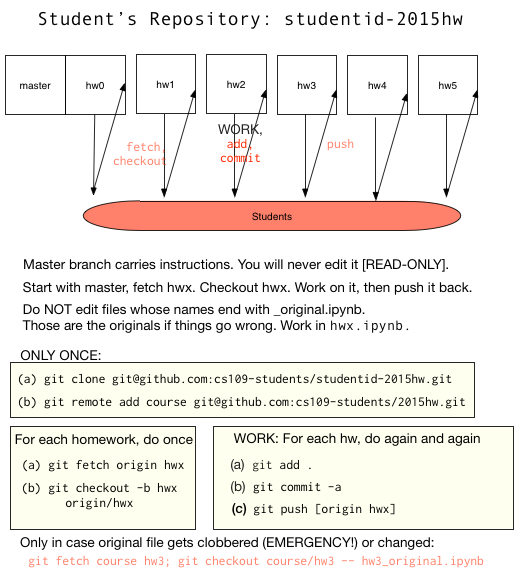

To make `hw0.ipynb` easily accessible, we added it to the public lab repo, so that you can read it even without having a github account. (Otherwise we would have a chicken and egg problem.). This is because our homework repository is private, and we have set it up so that your repositories are private as well.

Nevertheless, we want you to get acquainted with the workflow you must execute in order to obtain and submit homeworks. 

Let me first describe the steps by which you gain access to the homework.

1. At the beginning of this document you were asked to obtain a github id and enter it in the mandatory survey. We will use this github id to construct a homework repository for you with read-write access, and give you access to our read-only homework repository. You will be added to a github organization `cs109-students`.
2. Our read-only repository is `cs109-students/2015hw`. All students have read-only access to this repository. It will serve the job of the `course` remote, like above. Any changes after the homework has gone out will be made here.
3. You will have your own read-write repository under the `cs109-students` organization, which will be of the form `cs109-students/userid-2015hw`. Only you and the cs109 staff have access to this repository, thus ensuring the privacy of your homework.
4. When each homework is released, we will create a **branch** on your remote repository, `cs109-students/userid-2015hw`. The branches are, unimaginatively named: `hw0`, `hw1`,...,`hw5`. (For the curious, the way this works is by us creating one remote per student for a local clone of our `cs109-students/2015hw` repository, and pushing the new branch to it. We only push to a new branch each time as we dont want to be messing with a branch you have already worked on.). There is `master` branch too, which will have some instructions, but nothing very exciting. You will never work on this branch.

So now, how to you obtain and submit the homework? You wont be forking here.

1. You first make a clone of your repository. From the terminal, you issue the command: `git clone git@github.com:cs109-students/userid-2015hw.git` (for ssh users) or `git clone https://github.com/cs109-students/userid-2015hw.git` (for https users). Substitute your own userid for `userid`.
2. Next you add a remote `course` to track the read-only "guru" repository. The command for this is: `git remote add course git@github.com:cs109-students/2015hw.git` or `git remote add course https://github.com/cs109-students/2015hw.git`. This well help to incorporate any changes, just like above.
3. Your clone will come with a `master` branch, and perhaps a `hw0` branch. In either case you should first do `git fetch origin hw0`, which fetches from *your* remote repository on github the `hw0` branch. Then you issue `git checkout -b hw0 origin/hw0`. This command makes a new local branch `hw0` on your machine which tracks the `hw0` branch on your remote.
4. You are now in the `hw0` branch. This is where you will work on homework 0. Start the ipython notebook in the repository and run the homework. The file you will use is `hw0.ipynb`. DO NOT run the notebook ending in `_original.ipynb`. These are simply copies of the homework. We made these copies so that you can update them from our `course` remote in case we make any changes. You will now engage in the "add/commit/push" cycle as described above. (The `push` will only push to the remote `hw0` branch.)
5. We'll grade the last commit you make before the homework deadline. We will be looking for the file `hw0.ipynb`. (In actuality we wont grade homework 0 but check that you submitted it. But we will be using this mechanism to grade the homeworks from homework 1 onwards.)
6. When we are ready to send out homework 1 to you, we will create a new branch on your remote repository `git@github.com:cs109-students/userid-2015hw.git` on github with the name `hw1`. You will now repeat the process from step 3 onwards: `git fetch origin hw1` followed by `git checkout -b hw1 origin/hw1`. Then you work on the `hw1` branch, and engage in the "add/commit/push" cycle by running `hw1.ipynb`. And so on...

Once again, in case we make changes, you can incorporate them into your repo by doing: `git fetch course; git checkout course/hw0 -- hw0_original.ipynb`. An "add/commit/push" cycle will make sure these changes go into your fork as well. If you intend to work on the changed file `hw0_original.ipynb`, simply copy the file to `hw0.ipynb` and work on it. 

Remember that we will be looking for files `hw0.ipynb`, `hw1.ipynb`,...,`hw5.ipynb` as the semester goes on.

This process is summarized in the diagram above.

The homework repos are private, shared between you and the course staff. DO NOT share them or add any collaborators. That will violate the Honor Policy.

##The Lab git flow

Lets talk a bit about how labs and sections work in this course:

1. Lab Notebooks are made available every Thursday evening.
2. Lab Videos (which may not cover everything in the notebooks) are made available every Friday as well
3. In sections starting Monday morning, and running upto the next Friday, your TA will present part of the lab to you. You ought to have looked at and perhaps tried the lab over the previous weekend, and your section might reach a consensus on what you'd like your TF to focus on: please communicate this.

(Sections are 2 hours long. The first hour will be spent going over the lab, while the second if an office hour, where you can ask your TA questions about the homework, the lectures, the subject matter, and even the lab).

The labs will be made available on public github repositories, with naming schemes like `cs109/2015lab1`.

This is how you ought to work with them (our github tutorial has an example of this process on the `cs109/testing` repository):

1. First fork the lab from the github web interface. For example, the first lab is at: https://github.com/cs109/2015lab1 . The fork button is at the upper right corner of the page. Press it.
2. When it asks you where to fork the lab, choose your own github userid. The web interface will then take you to the web page for your fork. Mine is at: https://github.com/rahuldave/2015lab1 .
3. Now look for the clone url at the bottom right of the page. If you set up your ssh keys, use the ssh url, else use the https url. Mine are `git@github.com:rahuldave/2015lab1.git` and `https://github.com/rahuldave/2015lab1.git` respectively. 
4. Clone your fork down to your machine by obtaining a terminal (`/Applications/Utilities/Terminal.app` or equivalent on mac and `git-bash.exe` on windows). Change (`cd`) into an appropriate folder and clone by doing `git clone url` where the `url` is the one in step 3.
5. Add a remote for the original repository that you forked from. We'll call this remote `course`. The command for this, for example, for the first lab is: `git remote add course git@github.com:cs109/2015lab1.git` or `git remote add course https://github.com/cs109/2015lab1.git`
6. Now you have a local repository. Start the ipython notebook in the repository and run the labs. DO NOT run the notebooks ending in `_original.ipynb`. These are simply copies of the labs. We made these copies so that you can update them from our `course` remote in case we make any changes.

For Lab 1 I'd start with pythonpandas, followed by babypython, and finally git. The git notebook can be run under the ipython notebook. But the git commands can also be run directly on a terminal, which is probably the best place to do them...you can keep the notebook on the side to read as you follow along). So after once having read the tutorial, as described earlier, you now get to work through it.

When you follow along, you can add in your own notes, and try your own variations. As you are doing this, dont forget to continue doing the "add/commit/push" cycle, so that you save and version your changes, and push them to your fork. This typically looks like:
    - git add .
    - git commit -a
    - git push
    
In case we make changes, you can incorporate them into your repo by doing: `git fetch course; git checkout course/master -- labname_original.ipynb` where `labname.ipynb` is the lab in question. An "add/commit/push" cycle will make sure these changes go into your fork as well. If you intend to work on the changed file, simply copy the file to another one and work on it. Or you could make a new branch. Remember that this fork is YOUR repository, and you can do to it what you like. Your fork is public.

The diagram below should help elucidate the above and serve as a command cheat-sheet.
![homework](cs109gitflow3.png)



## Creating a new repository

Creating a repository can be done with git command line tools, or it can be done on github. On your github home, click on the 'Repositories' tab, then click the green 'New' button. You'll be brought to a page that asks for some basic project information.

![new repo](github_new.png)

 - The repository name needs to be unique, but only amongst *your* github repositories. Despite what github suggests, try to pick something at least a little representative of your project.
 
 - The description field is just a short text field that will accompany your repository's name on the github website.

 - If you're creating a new repository, check the "Initialize this repository with a README" box. This is a little bit of a misnomer. If you don't do this, you won't be able to clone your repository at all. Instead, you'll have to manually create a new repository on your computer and upload that to github. Suffice to say, unless you've got an existing git repository that was hosted somewhere besides github, *always check this box*.

 - You're free to click the `.gitignore` or `license` buttons, too, but there's no requirement to do so. You can easily create either later. For our class I use a python `.gitignore` from the dropdown menu

----

## Github Pages

In addition to hosting git repositories, github also provides web hosting for each user and project. Github provides [some documentation](https://pages.github.com/), but it's easier to create one than it is to figure out what to do with it next.

### Automatically Generated Project Pages

The easiest (and most limited) mechanism for creating a project page is to use the automatic page generator. Github's documentation does a fantastic job of guiding you through this, so I won't spend time on it. It's a 30-second process.

To edit the page, you can checkout the newly created `gh-pages` branch in your project and edit the index.html file. A much easier way to edit the page is simply to go through the automatic page generator tool again. It might seem counterintuitive, but github saves the content that you added the first time around, so you can make small changes without too much trouble.

In the end, automatically generated pages are a great replacement for a README.md file, but not much beyond that. You are limited to a single `index.html` file, and the templates are fixed. If you want a larger site or more customization options, you're better off doing something else.

### Static Project Pages

The next natural step is to use plain old static HTML. Regardless of how you create your site, github uses the `gh-pages` branch of your project to find your website files. One way to create this branch is to click on the "branch" button on your repository page:

<img src='github_branch.png' style="width:350px; display:inline-block;">

Alternately, if you've already clone your repository somewhere, you can do it on the command line:

When you push changes to this branch, they will immediately be reflected on the web at http://your-username.github.io/your-projectname.

You can use any static HTML, handwritten or otherwise.

----

## Git habits

** * Commit early, commit often. * **

Git is more effective when used at a fine granularity. For starters, you can't undo what you haven't committed, so committing lots of small changes makes it easier to find the right rollback point. Also, merging becomes a lot easier when you only have to deal with a handful of conflicts.

** * Commit unrelated changes separately. * **

Identifying the source of a bug or understanding the reason why a particular piece of code exists is much easier when commits focus on related changes. Some of this has to do with simplifying commit messages and making it easier to look through logs, but it has other related benefits: commits are smaller and simpler, and merge conflicts are confined to only the commits which actually have conflicting code.

** * Do not commit binaries and other temporary files. * **

Git is meant for tracking changes. In nearly all cases, the only meaningful difference between the contents of two binaries is that they are different. If you change source files, compile, and commit the resulting binary, git sees an entirely different file. The end result is that the git repository (which contains a complete history, remember) begins to become bloated with the history of many dissimilar binaries. Worse, there's often little advantage to keeping those files in the history. An argument can be made for periodically snapshotting working binaries, but things like object files, compiled python files, and editor auto-saves are basically wasted space.

** * Ignore files which should not be committed * **

Git comes with a built-in mechanism for ignoring certain types of files. Placing filenames or wildcards in a `.gitignore` file placed in the top-level directory (where the `.git` directory is also located) will cause git to ignore those files when checking file status. This is a good way to ensure you don't commit the wrong files accidentally, and it also makes the output of `git status` somewhat cleaner.

** * Always make a branch for new changes * **

While it's tempting to work on new code directly in the `master` branch, it's usually a good idea to create a new one instead, especially for team-based projects. The major advantage to this practice is that it keeps logically disparate change sets separate. This means that if two people are working on improvements in two different branches, when they merge, the actual workflow is reflected in the git history. Plus, explicitly creating branches adds some semantic meaning to your branch structure. Moreover, there is very little difference in how you use git.

** * Write good commit messages * **

I cannot understate the importance of this.

** Seriously. Write good commit messages. **